In [2]:
import csv
import jieba

#1. 使用豆瓣电影评论数据完成文本分类处理：文本预处理，加载、构建词典。
# （评论得分1～2	表示positive取值：1，评论得分4～5代表negative取值：0）
comments = []
with open('./archive/DMSC.csv', 'r') as f:
    readder = csv.DictReader(f)
    for row in readder:
        star = int(row['Star'])
        if star == 3:
            continue
        if star in [1, 2]:
            star = 1
        else:
            star = 0
        comment = jieba.lcut(row['Comment'])
        comments.append((comment, star))
len(comments)     

Building prefix dict from the default dictionary ...
Loading model from cache C:\Users\Administrator\AppData\Local\Temp\jieba.cache
Loading model cost 0.575 seconds.
Prefix dict has been built successfully.


1650497

In [3]:
comments[0]

([' ',
  '非常',
  '失望',
  '，',
  '剧本',
  '完全',
  '敷衍了事',
  '，',
  '主线',
  '剧情',
  '没',
  '突破',
  '大家',
  '可以',
  '理解',
  '，',
  '可',
  '所有',
  '的',
  '人物',
  '都',
  '缺乏',
  '动机',
  '，',
  '正邪',
  '之间',
  '、',
  '妇联',
  '内部',
  '都',
  '没什么',
  '火花',
  '。',
  '团结',
  '-',
  '分裂',
  '-',
  '团结',
  '的',
  '三段式',
  '虽然',
  '老套',
  '但',
  '其实',
  '也',
  '可以',
  '利用',
  '积攒',
  '下来',
  '的',
  '形象',
  '魅力',
  '搞',
  '出',
  '意思',
  '，',
  '但',
  '剧本',
  '写得',
  '非常',
  '肤浅',
  '、',
  '平面',
  '。',
  '场面',
  '上',
  '调度',
  '混乱',
  '呆板',
  '，',
  '满屏',
  '的',
  '铁甲',
  '审美疲劳',
  '。',
  '只有',
  '笑',
  '点算',
  '得',
  '上',
  '差强人意',
  '。'],
 1)

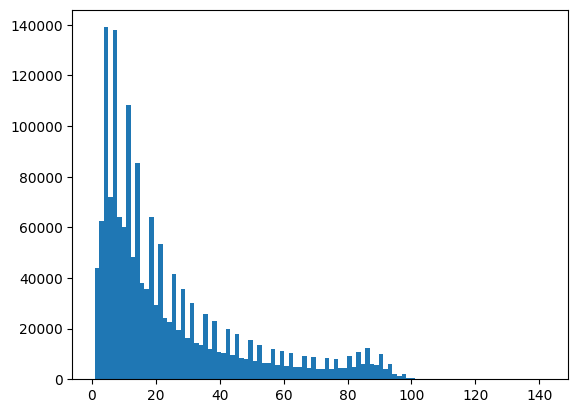

In [5]:
import matplotlib.pyplot as plt

comment_len = [len(c) for c,s in comments]
plt.hist(comment_len, bins=100)
plt.show()

<function matplotlib.pyplot.show(close=None, block=None)>

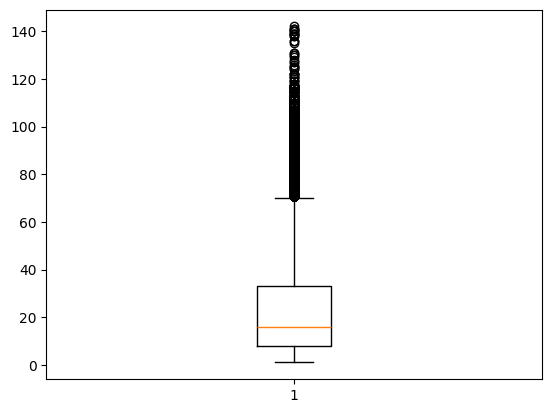

In [6]:
plt.boxplot(comment_len)
plt.show

In [13]:
comments = [c for c in comments if len(c[0]) in range(10, 160)]
len(comments)
comments[0][0]


[' ',
 '非常',
 '失望',
 '，',
 '剧本',
 '完全',
 '敷衍了事',
 '，',
 '主线',
 '剧情',
 '没',
 '突破',
 '大家',
 '可以',
 '理解',
 '，',
 '可',
 '所有',
 '的',
 '人物',
 '都',
 '缺乏',
 '动机',
 '，',
 '正邪',
 '之间',
 '、',
 '妇联',
 '内部',
 '都',
 '没什么',
 '火花',
 '。',
 '团结',
 '-',
 '分裂',
 '-',
 '团结',
 '的',
 '三段式',
 '虽然',
 '老套',
 '但',
 '其实',
 '也',
 '可以',
 '利用',
 '积攒',
 '下来',
 '的',
 '形象',
 '魅力',
 '搞',
 '出',
 '意思',
 '，',
 '但',
 '剧本',
 '写得',
 '非常',
 '肤浅',
 '、',
 '平面',
 '。',
 '场面',
 '上',
 '调度',
 '混乱',
 '呆板',
 '，',
 '满屏',
 '的',
 '铁甲',
 '审美疲劳',
 '。',
 '只有',
 '笑',
 '点算',
 '得',
 '上',
 '差强人意',
 '。']

In [11]:
import pickle

with open('./data/comments.pkl', 'wb') as f:
    pickle.dump(comments, f)